# 1. Load Libraries and Packages

#### Install modules

In [1]:
!pip install statsmodels
!pip install pydotplus

#### Load libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pygal
import pathlib
import numpy as np
import statsmodels.api as smf
import pydotplus


#### Read and Load Files

In [3]:
import os
import pandas as pd

# Get the path to the folder containing the CSV files
folder_path = "/Midterm"

# Get the paths to the CSV files in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Create a dictionary to store the DataFrames
dfs = {}

# Iterate over the paths
for file_path in file_paths:
    # Extract the file name without extension
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    # Read the file and store the DataFrame with the file name as key
    dfs[file_name] = pd.read_csv(file_path)


df_pal_review = dfs['pal_review']
df_airline_review = dfs['airline_review']

"""# Describe the pal_review DataFrame

print("DataFrame Name: pal_review")
print(df_pal_review.describe())

# Describe the airline_review DataFrame

print("DataFrame Name: airline_review")
print(df_airline_review.describe())"""

'# Describe the pal_review DataFrame\n\nprint("DataFrame Name: pal_review")\nprint(df_pal_review.describe())\n\n# Describe the airline_review DataFrame\n\nprint("DataFrame Name: airline_review")\nprint(df_airline_review.describe())'

####  Data Definition

#### Definition of Columns

1.	Gender: Gender of the passengers (Female, Male)
2.	Customer Type: The customer type (Loyal customer, disloyal customer)
3.	Age: The actual age of the passengers
4.	Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5.	Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6.	Flight distance: The flight distance of this journey
7.	Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8.	Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient (0:Not Applicable;1-5)
9.	Ease of Online booking: Satisfaction level of online booking (0:Not Applicable;1-5)
10.	Gate location: Satisfaction level of Gate location (0:Not Applicable;1-5)
11.	Food and drink: Satisfaction level of Food and drink (0:Not Applicable;1-5)
12.	Online boarding: Satisfaction level of online boarding (0:Not Applicable;1-5)
13.	Seat comfort: Satisfaction level of Seat comfort (0:Not Applicable;1-5)
14.	Inflight entertainment: Satisfaction level of inflight entertainment (0:Not Applicable;1-5)
15.	On-board service: Satisfaction level of On-board service (0:Not Applicable;1-5)
16.	Leg room service: Satisfaction level of Leg room service (0:Not Applicable;1-5)
17.	Baggage handling: Satisfaction level of baggage handling (0:Not Applicable;1-5)
18.	Check-in service: Satisfaction level of Check-in service (0:Not Applicable;1-5)
19.	Inflight service: Satisfaction level of inflight service (0:Not Applicable;1-5)
20.	Cleanliness: Satisfaction level of Cleanliness (0:Not Applicable;1-5)
21.	Departure Delay in Minutes: Minutes delayed when departure
22.	Arrival Delay in Minutes: Minutes delayed when Arrival
23.	Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)


# 2. Exploratory Data Analysis (EDA)

####  Check Shape

In [4]:
print("airline_review shape:",df_airline_review.shape)
print("pal_review shape:",df_pal_review.shape)

airline_review shape: (25976, 25)
pal_review shape: (891, 15)


#### Merge Files
We have two different data sets but has a similar topic of airline review. What we can do here now is to make use of concat() to join these two dataframes. Then it is expected that we will have NaN values, so we'll clean that up as well.
Merging the two files will give us a better manuever in data cleanup and drop unnecessary columns.

In [5]:
# Concatenate the DataFrames horizontally to merge the columns
combined_df = pd.concat([df_airline_review, df_pal_review])
combined_df

Unnamed: 0       id  Gender      Customer Type   Age   Type of Travel  \
0             0  19556.0  Female     Loyal Customer  52.0  Business travel   
1             1  90035.0  Female     Loyal Customer  36.0  Business travel   
2             2  12360.0    Male  disloyal Customer  20.0  Business travel   
3             3  77959.0    Male     Loyal Customer  44.0  Business travel   
4             4  36875.0  Female     Loyal Customer  49.0  Business travel   
..          ...      ...     ...                ...   ...              ...   
886         886      NaN     NaN                NaN   NaN              NaN   
887         887      NaN     NaN                NaN   NaN              NaN   
888         888      NaN     NaN                NaN   NaN              NaN   
889         889      NaN     NaN                NaN   NaN              NaN   
890         890      NaN     NaN                NaN   NaN              NaN   

        Class  Flight Distance  Inflight wifi service  \
0         Eco            160.0                    5.0   
1    Business           2863.0                    1.0   
2         Eco            192.0                    2.0   
3    Business           3377.0                    0.0   
4         Eco           1182.0                    2.0   
..        ...              ...                    ...   
886       NaN              NaN                    NaN   
887       NaN              NaN                    NaN   
888       NaN              NaN                    NaN   
889       NaN              NaN                    NaN   
890       NaN              NaN                    NaN   

     Departure/Arrival time convenient  ...  \
0                                  4.0  ...   
1                                  1.0  ...   
2                                  0.0  ...   
3                                  0.0  ...   
4                                  3.0  ...   
..                                 ...  ...   
886                                NaN  ...   
887                                NaN  ...   
888                                NaN  ...   
889                                NaN  ...   
890                                NaN  ...   

                                 Route  Date Flown  Seat Comfort  \
0                                  NaN         NaN           NaN   
1                                  NaN         NaN           NaN   
2                                  NaN         NaN           NaN   
3                                  NaN         NaN           NaN   
4                                  NaN         NaN           NaN   
..                                 ...         ...           ...   
886                   Riyadh to Manila  2020-01-01           3.0   
887                Melbourne to Manila  2020-01-01           4.0   
888  London to Kuala Lumpur via Manila  2020-03-01           0.0   
889                  Manila to Bacolod  2020-02-01           4.0   
890  San Francisco to Osaka via Manila  2020-03-01           0.0   

     Cabin Staff Service  Food & Beverages  Inflight Entertainment  \
0                    NaN               NaN                     NaN   
1                    NaN               NaN                     NaN   
2                    NaN               NaN                     NaN   
3                    NaN               NaN                     NaN   
4                    NaN               NaN                     NaN   
..                   ...               ...                     ...   
886                  5.0               5.0                     0.0   
887                  5.0               5.0                     4.0   
888                  0.0               0.0                     0.0   
889                  4.0               0.0                     0.0   
890                  0.0               0.0                     0.0   

     Ground Service  Value For Money  Wifi & Connectivity  Recommended  
0               NaN              NaN                  NaN          NaN  
1             

####  Check new dimensions
Checking the dimension gives us 26867 rows with 39 columns

In [6]:
#Check new dimensions
combined_df.shape

(26867, 39)

####  Check data type

In [7]:
#Check datatypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26867 entries, 0 to 890
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         26867 non-null  int64  
 1   id                                 25976 non-null  float64
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  float64
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  float64
 8   Inflight wifi service              25976 non-null  float64
 9   Departure/Arrival time convenient  25976 non-null  float64
 10  Ease of Online booking             25976 non-null  float64
 11  Gate location                      25976 non-null  float

####  Check for null values

In [8]:
#Check for null values 
combined_df.isna().sum()

Unnamed: 0                               0
id                                     891
Gender                                 891
Customer Type                          891
Age                                    891
Type of Travel                         891
Class                                  891
Flight Distance                        891
Inflight wifi service                  891
Departure/Arrival time convenient      891
Ease of Online booking                 891
Gate location                          891
Food and drink                         891
Online boarding                        891
Seat comfort                           891
Inflight entertainment                 891
On-board service                       891
Leg room service                       891
Baggage handling                       891
Checkin service                        891
Inflight service                       891
Cleanliness                            891
Departure Delay in Minutes             891
Arrival Del

# 3. Data Cleanup

#### Drop unnecessary columns

In [9]:
# Drop multiple columns
combined_df = combined_df.drop(['Unnamed: 0','id','Age','Type of Travel','Type Of Traveller',
                                'Flight Distance','Aircraft', 'Trip Verified','Gate location',
                                'Departure/Arrival time convenient','Route','Date Flown',
                                'Departure Delay in Minutes','Arrival Delay in Minutes','Customer Type','Gender'
                               ], axis=1)

####  Combine and Rename Similar Columns

In [10]:
#combine similar columns into a single column
combined_df['satisfaction'] = combined_df['satisfaction'].fillna(combined_df['Recommended'])
combined_df['satisfaction'] = combined_df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' or x == 'yes' else 0)
combined_df['Inflight wifi service'] = combined_df['Inflight wifi service'].fillna(combined_df['Wifi & Connectivity'])
combined_df['Class'] = combined_df['Class'].fillna(combined_df['Seat Type'])
combined_df['Food and drink'] = combined_df['Food and drink'].fillna(combined_df['Food & Beverages'])
combined_df['Seat Comfort'] = combined_df['Seat Comfort'].fillna(combined_df['Leg room service'])
combined_df['On-board service'] = combined_df['On-board service'].fillna(combined_df['Cabin Staff Service'])

In [11]:
#rename the columns
combined_df = combined_df.rename(columns={'satisfaction': 'Satisfaction'})
combined_df = combined_df.rename(columns={'Inflight wifi service': 'Inflight_Wifi'})
combined_df = combined_df.rename(columns={'Food and drink': 'Inflight_Meals'})
combined_df = combined_df.rename(columns={'On-board service': 'OnBoard_Service'})
combined_df = combined_df.rename(columns={'Online boarding': 'Online_Boarding'})
combined_df = combined_df.rename(columns={'Baggage handling': 'Baggage_Handling'})
combined_df = combined_df.rename(columns={'Inflight service': 'Inflight_Service'})
combined_df = combined_df.rename(columns={'Value For Money': 'Value_For_Money'})
combined_df = combined_df.rename(columns={'Seat Comfort': 'Seat_Comfort'})
combined_df = combined_df.rename(columns={'Ease of Online booking': 'Online_Booking'})
combined_df = combined_df.rename(columns={'Checkin service': 'CheckIn_Service'})
combined_df = combined_df.rename(columns={'Ground Service': 'Ground_Service'})
combined_df = combined_df.rename(columns={'Inflight Entertainment': 'Inflight_Entertainment'})


In [12]:
combined_df

Class  Inflight_Wifi  Online_Booking  Inflight_Meals  \
0              Eco            5.0             3.0             3.0   
1         Business            1.0             3.0             5.0   
2              Eco            2.0             2.0             2.0   
3         Business            0.0             0.0             3.0   
4              Eco            2.0             4.0             4.0   
..             ...            ...             ...             ...   
886  Economy Class            4.0             NaN             5.0   
887  Economy Class            4.0             NaN             5.0   
888  Economy Class            0.0             NaN             0.0   
889  Economy Class            0.0             NaN             0.0   
890  Economy Class            0.0             NaN             0.0   

     Online_Boarding  Seat comfort  Inflight entertainment  OnBoard_Service  \
0                4.0           3.0                     5.0              5.0   
1                4.0           5.0                     4.0              4.0   
2                2.0           2.0                     2.0              4.0   
3                4.0           4.0                     1.0              1.0   
4                1.0           2.0                     2.0              2.0   
..               ...           ...                     ...              ...   
886              NaN           NaN                     NaN              5.0   
887              NaN           NaN                     NaN              5.0   
888              NaN           NaN                     NaN              0.0   
889              NaN           NaN                     NaN              4.0   
890              NaN           NaN                     NaN              0.0   

     Leg room service  Baggage_Handling  ...  Satisfaction      Seat Type  \
0                 5.0               5.0  ...             1            NaN   
1                 4.0               4.0  ...             1            NaN   
2                 1.0               3.0  ...             0            NaN   
3                 1.0               1.0  ...             1            NaN   
4                 2.0               2.0  ...             1            NaN   
..                ...               ...  ...           ...            ...   
886               NaN               NaN  ...             1  Economy Class   
887               NaN               NaN  ...             1  Economy Class   
888               NaN               NaN  ...             0  Economy Class   
889               NaN               NaN  ...             0  Economy Class   
890               NaN               NaN  ...             0  Economy Class   

     Seat_Comfort  Cabin Staff Service Food & Beverages  \
0             5.0                  NaN              NaN   
1             4.0                  NaN              NaN   
2             1.0                  NaN              NaN   
3             1.0                  NaN              NaN   
4             2.0                  NaN              NaN   
..            ...                  ...              ...   
886           3.0                  5.0              5.0   
887           4.0                  5.0              5.0   
888           0.0                  0.0              0.0   
889           4.0                  4.0              0.0   
890           0.0                  0.0              0.0   

     Inflight_Entertainment  Ground_Service  Value_For_Money  \
0                       NaN             NaN              NaN   
1                       NaN             NaN              NaN   
2                       NaN             NaN              NaN   
3                       NaN             NaN              NaN   
4                       NaN             NaN              NaN   
..                      ...             ...              ...   
886                     0.0             5.0              5.0   
887                     4.0             2.0              5.0   
888                     0

####  Check for unique values
Check the unique values in order to better change and map the values to be categorical

In [13]:
#check for the unique values
unique_values = {}
for column in combined_df.columns:
    unique_values[column] = combined_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values of column {column}:")
    print(values)
    print()


Unique values of column Class:
['Eco' 'Business' 'Eco Plus' 'Business Class' 'Economy Class'
 'Premium Economy' 'First Class']

Unique values of column Inflight_Wifi:
[5. 1. 2. 0. 3. 4.]

Unique values of column Online_Booking:
[ 3.  2.  0.  4.  5.  1. nan]

Unique values of column Inflight_Meals:
[3. 5. 2. 4. 1. 0.]

Unique values of column Online_Boarding:
[ 4.  2.  1.  5.  3.  0. nan]

Unique values of column Seat comfort:
[ 3.  5.  2.  4.  1. nan]

Unique values of column Inflight entertainment:
[ 5.  4.  2.  1.  3.  0. nan]

Unique values of column OnBoard_Service:
[5. 4. 1. 2. 3. 0.]

Unique values of column Leg room service:
[ 5.  4.  1.  2.  3.  0. nan]

Unique values of column Baggage_Handling:
[ 5.  4.  3.  1.  2. nan]

Unique values of column CheckIn_Service:
[ 2.  3.  4.  1.  5. nan]

Unique values of column Inflight_Service:
[ 5.  4.  2.  1.  3.  0. nan]

Unique values of column Cleanliness:
[ 5.  2.  4.  3.  1.  0. nan]

Unique values of column Satisfaction:
[1 0]

Unique

####  Replace non-finite values with a default value (e.g., -1)

In [14]:
combined_df = combined_df.replace([np.inf, -np.inf, np.nan], 0)

In [15]:
combined_df

Class  Inflight_Wifi  Online_Booking  Inflight_Meals  \
0              Eco            5.0             3.0             3.0   
1         Business            1.0             3.0             5.0   
2              Eco            2.0             2.0             2.0   
3         Business            0.0             0.0             3.0   
4              Eco            2.0             4.0             4.0   
..             ...            ...             ...             ...   
886  Economy Class            4.0             0.0             5.0   
887  Economy Class            4.0             0.0             5.0   
888  Economy Class            0.0             0.0             0.0   
889  Economy Class            0.0             0.0             0.0   
890  Economy Class            0.0             0.0             0.0   

     Online_Boarding  Seat comfort  Inflight entertainment  OnBoard_Service  \
0                4.0           3.0                     5.0              5.0   
1                4.0           5.0                     4.0              4.0   
2                2.0           2.0                     2.0              4.0   
3                4.0           4.0                     1.0              1.0   
4                1.0           2.0                     2.0              2.0   
..               ...           ...                     ...              ...   
886              0.0           0.0                     0.0              5.0   
887              0.0           0.0                     0.0              5.0   
888              0.0           0.0                     0.0              0.0   
889              0.0           0.0                     0.0              4.0   
890              0.0           0.0                     0.0              0.0   

     Leg room service  Baggage_Handling  ...  Satisfaction      Seat Type  \
0                 5.0               5.0  ...             1              0   
1                 4.0               4.0  ...             1              0   
2                 1.0               3.0  ...             0              0   
3                 1.0               1.0  ...             1              0   
4                 2.0               2.0  ...             1              0   
..                ...               ...  ...           ...            ...   
886               0.0               0.0  ...             1  Economy Class   
887               0.0               0.0  ...             1  Economy Class   
888               0.0               0.0  ...             0  Economy Class   
889               0.0               0.0  ...             0  Economy Class   
890               0.0               0.0  ...             0  Economy Class   

     Seat_Comfort  Cabin Staff Service Food & Beverages  \
0             5.0                  0.0              0.0   
1             4.0                  0.0              0.0   
2             1.0                  0.0              0.0   
3             1.0                  0.0              0.0   
4             2.0                  0.0              0.0   
..            ...                  ...              ...   
886           3.0                  5.0              5.0   
887           4.0                  5.0              5.0   
888           0.0                  0.0              0.0   
889           4.0                  4.0              0.0   
890           0.0                  0.0              0.0   

     Inflight_Entertainment  Ground_Service  Value_For_Money  \
0                       0.0             0.0              0.0   
1                       0.0             0.0              0.0   
2                       0.0             0.0              0.0   
3                       0.0             0.0              0.0   
4                       0.0             0.0              0.0   
..                      ...             ...              ...   
886                     0.0             5.0              5.0   
887                     4.0             2.0              5.0   
888                     0

#### Delete old columns from 3.2

In [16]:
combined_df.drop(['Inflight entertainment','Wifi & Connectivity','Seat comfort','Recommended',
                 'Food & Beverages','Seat Type','Cabin Staff Service','Leg room service','Food & Beverages'], 
                 axis=1, inplace = True)

In [17]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26867 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Class                   26867 non-null  object 
 1   Inflight_Wifi           26867 non-null  float64
 2   Online_Booking          26867 non-null  float64
 3   Inflight_Meals          26867 non-null  float64
 4   Online_Boarding         26867 non-null  float64
 5   OnBoard_Service         26867 non-null  float64
 6   Baggage_Handling        26867 non-null  float64
 7   CheckIn_Service         26867 non-null  float64
 8   Inflight_Service        26867 non-null  float64
 9   Cleanliness             26867 non-null  float64
 10  Satisfaction            26867 non-null  int64  
 11  Seat_Comfort            26867 non-null  float64
 12  Inflight_Entertainment  26867 non-null  float64
 13  Ground_Service          26867 non-null  float64
 14  Value_For_Money         26867 non-null  

#### Encode categorical value

In [18]:
#check for the unique values
unique_values = {}
for column in combined_df.columns:
    unique_values[column] = combined_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values of column {column}:")
    print(values)
    print()

Unique values of column Class:
['Eco' 'Business' 'Eco Plus' 'Business Class' 'Economy Class'
 'Premium Economy' 'First Class']

Unique values of column Inflight_Wifi:
[5. 1. 2. 0. 3. 4.]

Unique values of column Online_Booking:
[3. 2. 0. 4. 5. 1.]

Unique values of column Inflight_Meals:
[3. 5. 2. 4. 1. 0.]

Unique values of column Online_Boarding:
[4. 2. 1. 5. 3. 0.]

Unique values of column OnBoard_Service:
[5. 4. 1. 2. 3. 0.]

Unique values of column Baggage_Handling:
[5. 4. 3. 1. 2. 0.]

Unique values of column CheckIn_Service:
[2. 3. 4. 1. 5. 0.]

Unique values of column Inflight_Service:
[5. 4. 2. 1. 3. 0.]

Unique values of column Cleanliness:
[5. 2. 4. 3. 1. 0.]

Unique values of column Satisfaction:
[1 0]

Unique values of column Seat_Comfort:
[5. 4. 1. 2. 3. 0.]

Unique values of column Inflight_Entertainment:
[0. 2. 1. 3. 5. 4.]

Unique values of column Ground_Service:
[0. 1. 4. 5. 2. 3.]

Unique values of column Value_For_Money:
[0. 1. 3. 2. 5. 4.]



#### Change and map the values to be categorical

In [19]:
combined_df['Class'] = combined_df['Class'].map({'Business': 1, 'Business Class': 1, 
                                                 'First Class': 2,
                                                 'Premium Economy': 3, 'Eco Plus': 3, 
                                                 'Economy Class': 4, 'Eco': 4})


In [20]:
#check for the unique values
unique_values = {}
for column in combined_df.columns:
    unique_values[column] = combined_df[column].unique()

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"Unique values of column {column}:")
    print(values)
    print()

Unique values of column Class:
[4 1 3 2]

Unique values of column Inflight_Wifi:
[5. 1. 2. 0. 3. 4.]

Unique values of column Online_Booking:
[3. 2. 0. 4. 5. 1.]

Unique values of column Inflight_Meals:
[3. 5. 2. 4. 1. 0.]

Unique values of column Online_Boarding:
[4. 2. 1. 5. 3. 0.]

Unique values of column OnBoard_Service:
[5. 4. 1. 2. 3. 0.]

Unique values of column Baggage_Handling:
[5. 4. 3. 1. 2. 0.]

Unique values of column CheckIn_Service:
[2. 3. 4. 1. 5. 0.]

Unique values of column Inflight_Service:
[5. 4. 2. 1. 3. 0.]

Unique values of column Cleanliness:
[5. 2. 4. 3. 1. 0.]

Unique values of column Satisfaction:
[1 0]

Unique values of column Seat_Comfort:
[5. 4. 1. 2. 3. 0.]

Unique values of column Inflight_Entertainment:
[0. 2. 1. 3. 5. 4.]

Unique values of column Ground_Service:
[0. 1. 4. 5. 2. 3.]

Unique values of column Value_For_Money:
[0. 1. 3. 2. 5. 4.]



In [21]:
#Change to int

combined_df['Inflight_Wifi'] = combined_df['Inflight_Wifi'].astype(int)
combined_df['Online_Booking'] = combined_df['Online_Booking'].astype(int)
combined_df['Inflight_Meals'] = combined_df['Inflight_Meals'].astype(int)

combined_df['Online_Boarding'] = combined_df['Online_Boarding'].astype(int)
combined_df['OnBoard_Service'] = combined_df['OnBoard_Service'].astype(int)
combined_df['Baggage_Handling'] = combined_df['Baggage_Handling'].astype(int)

combined_df['CheckIn_Service'] = combined_df['CheckIn_Service'].astype(int)
combined_df['Inflight_Service'] = combined_df['Inflight_Service'].astype(int)
combined_df['Cleanliness'] = combined_df['Cleanliness'].astype(int)

combined_df['Satisfaction'] = combined_df['Satisfaction'].astype(int)
combined_df['Seat_Comfort'] = combined_df['Seat_Comfort'].astype(int)
combined_df['Inflight_Entertainment'] = combined_df['Inflight_Entertainment'].astype(int)

combined_df['Ground_Service'] = combined_df['Ground_Service'].astype(int)
combined_df['Value_For_Money'] = combined_df['Value_For_Money'].astype(int)

# 4. Analysis

#### Check Summary

In [22]:
combined_df.describe()

Class  Inflight_Wifi  Online_Booking  Inflight_Meals  \
count  26867.000000   26867.000000    26867.000000    26867.000000   
mean       2.516507       2.657163        2.665352        3.171325   
std        1.451253       1.379076        1.474417        1.361382   
min        1.000000       0.000000        0.000000        0.000000   
25%        1.000000       2.000000        2.000000        2.000000   
50%        3.000000       3.000000        3.000000        3.000000   
75%        4.000000       4.000000        4.000000        4.000000   
max        4.000000       5.000000        5.000000        5.000000   

       Online_Boarding  OnBoard_Service  Baggage_Handling  CheckIn_Service  \
count     26867.000000     26867.000000      26867.000000     26867.000000   
mean          3.153497         3.357762          3.512748         3.204265   
std           1.455217         1.308699          1.327242         1.382013   
min           0.000000         0.000000          0.000000         0.000000   
25%           2.000000         2.000000          3.000000         2.000000   
50%           3.000000         4.000000          4.000000         3.000000   
75%           4.000000         4.000000          5.000000         4.000000   
max           5.000000         5.000000          5.000000         5.000000   

       Inflight_Service   Cleanliness  Satisfaction  Seat_Comfort  \
count      26867.000000  26867.000000  26867.000000  26867.000000   
mean           3.528232      3.177243      0.429709      3.313619   
std            1.332210      1.424493      0.495044      1.341705   
min            0.000000      0.000000      0.000000      0.000000   
25%            3.000000      2.000000      0.000000      2.000000   
50%            4.000000      3.000000      0.000000      4.000000   
75%            5.000000      4.000000      1.000000      4.000000   
max            5.000000      5.000000      1.000000      5.000000   

       Inflight_Entertainment  Ground_Service  Value_For_Money  
count            26867.000000    26867.000000     26867.000000  
mean                 0.044851        0.062121         0.075446  
std                  0.380270        0.438902         0.479230  
min                  0.000000        0.000000         0.000000  
25%                  0.000000        0.000000         0.000000  
50%                  0.000000        0.000000         0.000000  
75%                  0.000000        0.000000         0.000000  
max                  5.000000        5.000000         5.000000

#### Frequency of Numerical Variables

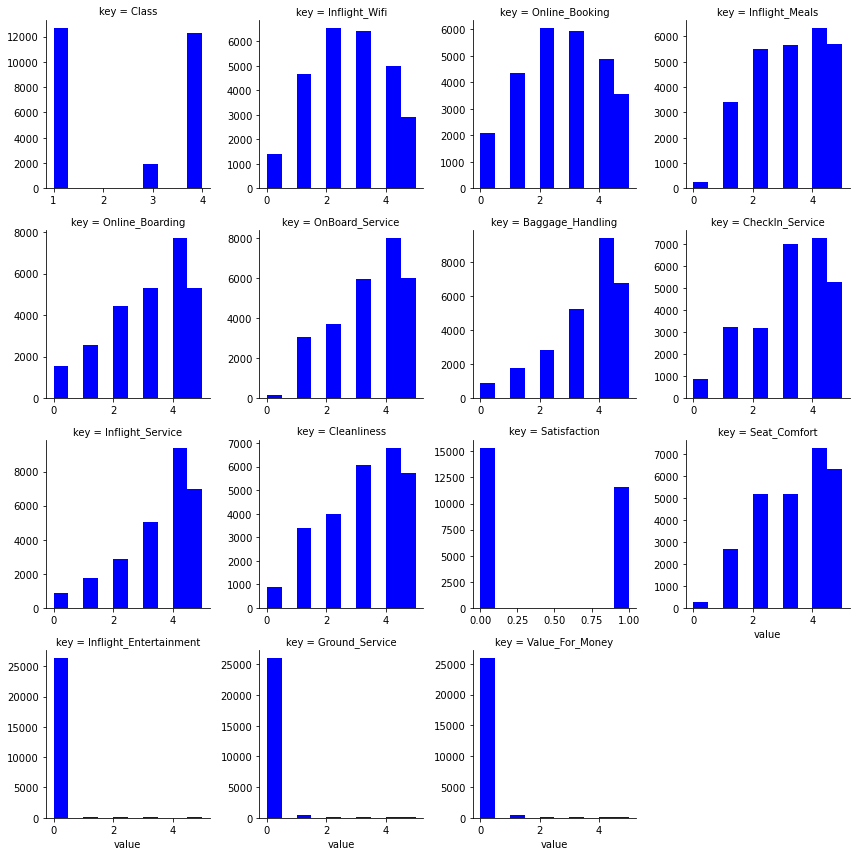

In [23]:
# Select numeric columns and melt the dataframe
numeric_cols = combined_df.select_dtypes(include='number')
melted_df = numeric_cols.melt(var_name='key', value_name='value')

# Create histogram with facet wrap
g = sns.FacetGrid(data=melted_df, col='key', col_wrap=4, sharex=False, sharey=False)
g.map(plt.hist, 'value', bins=10, color='blue')

# Show the plot
plt.show()

As we can see in the graph, there is an abnormal skewness in Satisfaction

# 5. Model Preparation

#### Check Cross Validation

Check the proportion of the target variable. The 'proportions' counts the occurrences of each unique value in the column and normalizes the counts to calculate proportions instead. The resulting proportions represent the relative frequencies of each category within the column.

In [24]:
# Calculate the proportion of each category
proportions = combined_df['Satisfaction'].value_counts(normalize=True)

# Display the proportions
print(proportions)

0    0.570291
1    0.429709
Name: Satisfaction, dtype: float64


#### Count the occurence of 0/1 value in Satisfaction column

In [25]:
combined_df.Satisfaction.value_counts()

0    15322
1    11545
Name: Satisfaction, dtype: int64

#### Check the shape of the dataframe

In [26]:
combined_df.shape

(26867, 15)

#### Plot the correlation map

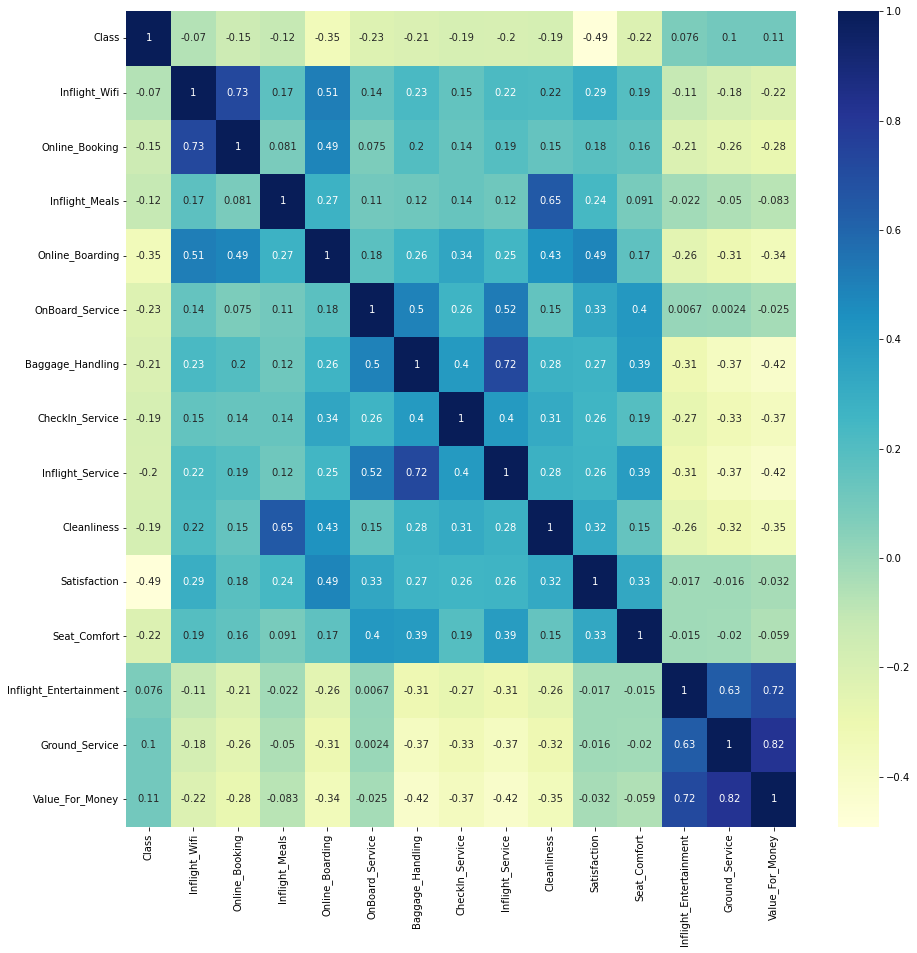

In [27]:
plt.rcParams["figure.figsize"] = (15,15)

# plotting correlation heatmap
dataplot = sns.heatmap(combined_df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

Given the map, the strongest relation with Satisfaction is Online Boarding

# 6. Modelling

## Logistic Regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring; in this case, satisfied or not satisfied

#### Split Dataset for Training and Testing

To finish up our data pre-processing steps we will split our data into two dataset, training and testing. For this, we will split the dataset into 80:20 ratio. 80% for the training, 20% for the testing.

In [28]:
# Select Features
feature = combined_df.drop('Satisfaction', axis=1)

# Select Target
target = combined_df['Satisfaction']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, shuffle = True, test_size=0.2, random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (21493, 14)
Shape of testing feature: (5374, 14)
Shape of training label: (21493,)
Shape of training label: (5374,)


**train_test_split** is a scikit feature for splitting the dataset into training and test sets. The following are components of train_test_split:

**1. feature** represents the input features or independent variables of your dataset. It contains the data you want to use to make predictions or model the relationship with the target variable.

**2. target** represents the dependent variable you are trying to predict or model based on the input features in feature.

**3. shuffle** is a parameter that determines whether the data will be shuffled before splitting. If set to True, the data will be randomly shuffled before splitting. Shuffling the data is useful when the dataset has a particular order that might affect the performance of the model.

**4. test_size** is a parameter determines the proportion of the dataset that will be allocated for testing. In this case, 0.2 means 20% of the data will be used for testing, while the remaining 80% will be used for training.

**5. random_state** is used to set a seed value for the random number generator. It ensures that the data is split in the same way every time you run the code with the same random_state value. This allows for reproducibility of the results.

"Shape of training feature: (21493, 14)" means that the training dataset has 21,493 samples (rows) and 14 features (columns).

"Shape of testing feature: (5374, 14)" means that the testing dataset has 5,374 samples (rows) and 14 features (columns).

"Shape of training label: (21493,)" means that the training dataset has 21,493 labels (corresponding to the training samples). The absence of a second value in the tuple indicates that the labels are in a one-dimensional array.

"Shape of training label: (5374,)" means that the testing dataset has 5,374 labels (corresponding to the testing samples). Similarly, the absence of a second value in the tuple indicates that the labels are in a one-dimensional array.

#### Statistics Summary

MLE or the Maximum Likelihood Estimation.
Psuedo R-sqaured - any value close to 1 is considered good (log-likelihood minus 1, divided by LL-Null)
LL Null - fitted model with all intercepts excluding null values

Based on the result, the Inflight_Entertainment is not a significant variable having a 0.298 score of p-value. This column can be removed.

In [29]:
Xa_train = X_train
ya_train = y_train

# Fit the logistic regression model
model_reg1 = smf.Logit(ya_train, Xa_train).fit()

# Print the summary statistics
print(model_reg1.summary())

Optimization terminated successfully.
         Current function value: 0.448749
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:                21493
Model:                          Logit   Df Residuals:                    21479
Method:                           MLE   Df Model:                           13
Date:                Tue, 06 Jun 2023   Pseudo R-squ.:                  0.3435
Time:                        21:54:19   Log-Likelihood:                -9645.0
converged:                       True   LL-Null:                       -14691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Class                     -0.9111      0.012    -74.174      0.000      -0.935      

#### Collinearity Summary

The VIF values indicate the extent of multicollinearity between each variable and the other variables in the model. 
Higher VIF values suggest higher multicollinearity, with a commonly used threshold of 5 or 10 for identifying variables with high multicollinearity meaning that when some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. 

When the VIF values are below the threshold (e.g., 10), it indicates that the variables are relatively independent of each other and do not exhibit strong multicollinearity. This is generally considered desirable because it allows the model to estimate the effects of individual predictors more accurately.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the design matrix (exogenous variables)
X = model_reg1.model.exog

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = model_reg1.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Display the VIF values
#print(vif)
vif_sorted = vif.sort_values(by="VIF", ascending=False)
print(vif_sorted)

                  Variable        VIF
8         Inflight_Service  19.658501
6         Baggage_Handling  18.865976
9              Cleanliness  13.604730
5          OnBoard_Service  12.729258
3           Inflight_Meals  11.518448
1            Inflight_Wifi  11.297451
4          Online_Boarding  10.299485
2           Online_Booking   9.642259
10            Seat_Comfort   9.200595
7          CheckIn_Service   8.398861
13         Value_For_Money   3.992187
12          Ground_Service   3.218994
0                    Class   3.192105
11  Inflight_Entertainment   2.242392


In this case, we have multiple variables having strong multicollinearity. Which, if observed, these are core factors of a customer satisfaction journey starting from booking to flying.

#### Scaling the Data
To avoid leakage, the scaler is fitted to the X_train data and the train values are then used to scale or transform both the train and test data.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Check and Remove Outliers
This can affect the overall data series. These anomalies are treated as abnormal values that can distort the final insights.

<AxesSubplot:>

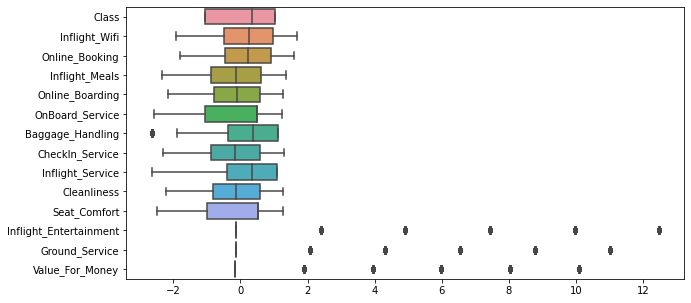

In [32]:
# Plot the confusion matrix
plt.rcParams["figure.figsize"] = (10,5)

column_names = combined_df.drop('Satisfaction', axis=1).columns
#X_train = X_train[column_names]
X_train = pd.DataFrame(X_train, columns=column_names)

sns.boxplot(data=X_train, orient='h')

Baggage_Handling have outliers

In [33]:
#Remove Outliers

from scipy.stats import iqr

Q1 = X_train.quantile(q=.25)
Q3 = X_train.quantile(q=.75)

IQR = X_train.apply(iqr)

# Calculating minimum and maximum values
minimum = X_train < (Q1-1.5*IQR)
maximum = X_train > (Q3+1.5*IQR)

# The tilde (~) is a reverse operator, and it will select any row that is not below the minimum or above the maximum area, this is our IQR filter
filter = ~(minimum | maximum).any(axis=1)

# We can now select the IQR rows in X_train
X_train = X_train[filter]

In [34]:
# Show the Training and Testing Data
print('Shape of X_train feature:', X_train.shape)
print('Shape of X_test feature:', X_test.shape)
print('Shape of y_train label:', y_train.shape)
print('Shape of y_test label:', y_test.shape)

Shape of X_train feature: (20765, 14)
Shape of X_test feature: (5374, 14)
Shape of y_train label: (21493,)
Shape of y_test label: (5374,)


In [35]:
X_train.shape

(20765, 14)

The original shape of training feature: (21493, 14). After removing 728 outliers, we now have 2075 rows. 

In [36]:
((21493 - 20765) * 100) / 20765

3.5058993498675655

In [37]:
y_train.shape

(21493,)

We need to match the y_train with X_train that still contains gaps after removing the outliers.

In [38]:
y_train = y_train.iloc[X_train.index]

In [39]:
y_train.shape

(20765,)

Now both X_train and y_train have same shape

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20765, 14), (5374, 14), (20765,), (5374,))

# 7.Predict Logistic Regression Results

#### Implement Logistic Regression

In [41]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

#### Model Fitting

In [42]:
# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

#### Predict Probability

In [43]:
y_pred = logreg.predict(X_test)
y_pred

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 1, ..., 0, 0, 1])

Code above predicts the Satisfaction score of 0/1 per row. Now let's see the values of first three rows:

In [44]:
X_train[:3]

Class  Inflight_Wifi  Online_Booking  Inflight_Meals  Online_Boarding  \
0 -1.043869      -1.201798       -1.128533       -0.127687         0.584579   
1 -1.043869       1.698929        1.586059        0.608269         1.270369   
2 -1.043869      -1.201798        0.907411       -1.599598        -1.472791   

   OnBoard_Service  Baggage_Handling  CheckIn_Service  Inflight_Service  \
0         0.488688          0.370467         0.574231          0.354283   
1        -1.039630         -1.131174         0.574231         -1.141562   
2        -0.275471         -1.131174        -0.147943         -1.141562   

   Cleanliness  Seat_Comfort  Inflight_Entertainment  Ground_Service  \
0    -0.125488      0.510577               -0.121607       -0.143483   
1    -0.125488     -0.982767               -0.121607       -0.143483   
2    -1.526227     -0.236095               -0.121607       -0.143483   

   Value_For_Money  
0        -0.159572  
1        -0.159572  
2        -0.159572

In [45]:
y_pred[:3]

array([0, 0, 1])

In [46]:
y_pred_proba = logreg.predict_proba(X_test)

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
y_pred_proba[:3]

array([[0.56143127, 0.43856873],
       [0.9427545 , 0.0572455 ],
       [0.18396046, 0.81603954]])

This is a better approach because in here, we can say that there is 56% chance of dissatisfaction and 44% satisfaction, and so on.

In [48]:
# probability of getting output as 0 or not satisfied

y_satisfied = logreg.predict_proba(X_test)[:,0]

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
y_satisfied[:3]

array([0.56143127, 0.9427545 , 0.18396046])

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20765, 14), (5374, 14), (20765,), (5374,))

#### Classification Scores and Confusion Matrix
The classification report contains the most used classification metrics, such as precision, recall, f1-score, and accuracy.

**Precision** to understand what correct prediction values were considered correct by our classifier. <br>
**Recall** to understand how many of the true positives were identified by our classifier. <br>
**F1 score** is the balanced or harmonic mean of precision and recall. The lowest value is 0 and the highest is 1. When f1-score is equal to 1, it means all classes were correctly predicted. <br>
**Accuracy** describes how many predictions our classifier got right. The lowest accuracy value is 0 and the highest is 1.

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3088
           1       0.82      0.79      0.81      2286

    accuracy                           0.84      5374
   macro avg       0.84      0.83      0.83      5374
weighted avg       0.84      0.84      0.84      5374



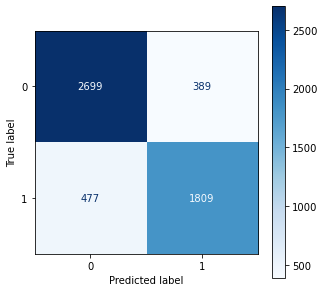

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The model's accuracy is able to predict correctly 84% of the time. <br>
However, accuracy alone may not be a sufficient basis to evaluate the model's performance. We'll check further the model's performance using other algorithms such as Decision Tree and Random Forest to get a better analysis<br>
As for the confusion matrix, we see here that there are 2699 true negatives predicted, and we have 1809 true positives. We have 389 rows that were supposed to be 0 but were predicted 1, and we have 477 rows that were supposed to be 1 but were predicted 0.<br>

#### Coefficients and Intercept

In [52]:
#coefficients - these are the dependent variables
logreg.coef_

array([[-0.98979208,  0.72713575, -0.53665513,  0.07357753,  0.95417715,
         0.35796645,  0.05053071,  0.20288671,  0.05508934,  0.38365155,
         0.40667891,  0.07113137,  0.08392738,  0.09333859]])

In [53]:
#intercept
logreg.intercept_

array([-0.58492997])

#### AUC Result

One way to quantify how well the logistic regression model does at classifying data is to calculate AUC, which stands for “area under curve.” The closer AUC is to 1, the better the model.

In [54]:
from sklearn import metrics

#use model to predict probability that given y value is 1
y_pred = logreg.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred)

#print AUC score
print(auc)

0.902610335948939


C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


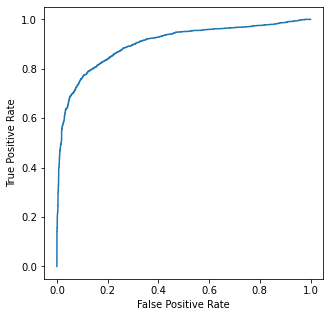

In [55]:
plt.rcParams["figure.figsize"] = (5,5)
#define metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 8. Regression Decision Tree
We'll copy the data set we previously used in our logistic regression for the decision tree training and test. This algorithm will further fortify decision making in what factors can predict a passenger's flight satisfaction.

In [56]:
dtree_c = combined_df.copy()

#### Train and fit the Decision Tree
Import the DecisionTreeRegressor class and create an instance by assigning the class to dtree variable. Finally, fit the decision model

In [57]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
dtree_c = DecisionTreeClassifier(max_depth=10)
dtree_c.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

#### Predictions

In [58]:
# Make predictions on the test set
predictions = dtree_c.predict(X_test)
predictions

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 1, ..., 0, 0, 0])

In [59]:
# Make predictions based on new values
#new_data = [[1,5,3,3,1,5,5,2,5,5,1,5,0,0]]
#new_data = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0]]
#predictions_new = dtree_c.predict(new_data)
#print(predictions_new)


#### Accuracy based on Gini

In [60]:
# import accuracy_score 
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=dtree_c.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=predictions))

Accuracy Score on train data (using Default criterionas gini):  0.9350349145196244
Accuracy Score on test data (using Default criterionas gini):  0.9181243021957574


#### Accuracy based on Entropy

In [62]:
# Changing the Criterion to Entropy
dtreec_entropy = DecisionTreeClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
dtreec_entropy.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_entropy =  dtreec_entropy.predict(X_test)

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [63]:
print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =dtreec_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

Accuracy Score on train data (using Default criterion as Entropy):  0.9949434143992295
Accuracy Score on test data (using Default criterion as Entropy):  0.9119836248604392


#### Accuracy based on Entropy & min_split

In [64]:
# After tune the parameters of the decision tree to increase its accuracy
dtreec_entropy2 = DecisionTreeClassifier(min_samples_split=50)
dtreec_entropy2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=50)

In [65]:
print('Accuracy Score on train data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_train, y_pred=dtreec_entropy2.predict(X_train)))
print('Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_test, y_pred=dtreec_entropy2.predict(X_test)))

Accuracy Score on train data (using Default criterion as Entropy & min_samples_split):  0.936335179388394
Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split):  0.9211016002977298


C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Tree Visualization

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.770336 to fit

(process:20272): GLib-GIO-WARNING **: 21:54:25.939: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



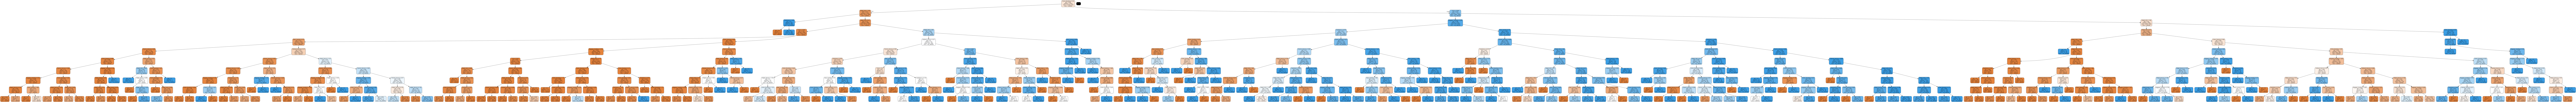

In [66]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree_c, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns.tolist(),
                class_names =['satisfied','not_satisfied'])
            
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Check the feature importance

In [67]:
# Create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(X_train.columns, dtree_c.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
feat_df

Feature  Importance
0          Online_Boarding    0.411311
1            Inflight_Wifi    0.269265
2                    Class    0.134543
3         Baggage_Handling    0.034683
4              Cleanliness    0.026544
5             Seat_Comfort    0.026247
6         Inflight_Service    0.025151
7          OnBoard_Service    0.021766
8          CheckIn_Service    0.021185
9           Online_Booking    0.020689
10          Inflight_Meals    0.008617
11  Inflight_Entertainment    0.000000
12          Ground_Service    0.000000
13         Value_For_Money    0.000000

In [68]:
# Create a DataFrame to store the feature importances
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtree_c.feature_importances_})

# Sort the DataFrame by importance values in descending order
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feat_df)

                   Feature  Importance
4          Online_Boarding    0.411311
1            Inflight_Wifi    0.269265
0                    Class    0.134543
6         Baggage_Handling    0.034683
9              Cleanliness    0.026544
10            Seat_Comfort    0.026247
8         Inflight_Service    0.025151
5          OnBoard_Service    0.021766
7          CheckIn_Service    0.021185
2           Online_Booking    0.020689
3           Inflight_Meals    0.008617
11  Inflight_Entertainment    0.000000
12          Ground_Service    0.000000
13         Value_For_Money    0.000000


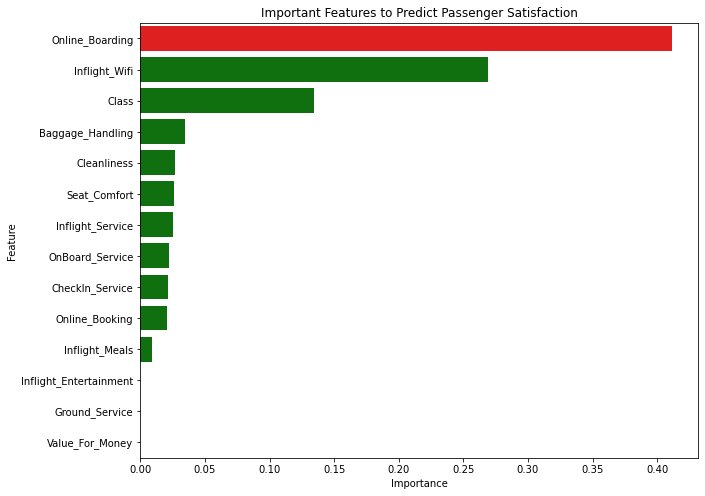

In [69]:
# Plot the feature x importance
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important Features to Predict Passenger Satisfaction')
plt.show()

#### Classification Scores and Confusion Matrix

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3088
           1       0.93      0.87      0.90      2286

    accuracy                           0.92      5374
   macro avg       0.92      0.91      0.92      5374
weighted avg       0.92      0.92      0.92      5374



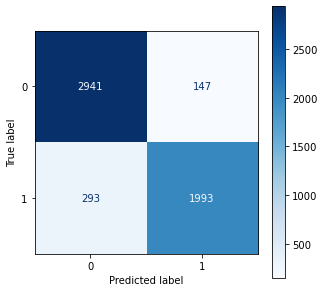

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the classification report
print(classification_report(y_test, predictions))

# Plot the confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtree_c.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# 9.Random Forest
We'll be copying the same data set we previously used in our logistic regression for the random forest training and test

In [71]:
rforest = combined_df.copy()

#### Training a Random Forest
Import the RandomForestClassifier class and create an instance by assigning the class to rfc variable. 

Notice that the n_estimators is assigned to have '600' as its value. The n_estimators determines the number of decision trees in the random forest. The higher its value, the better performance but can make your code slower. A higher value is preferred as it makes your predictions stronger and more stable.

Finally, fit the decision model

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

#### Visualizing Random Forest 

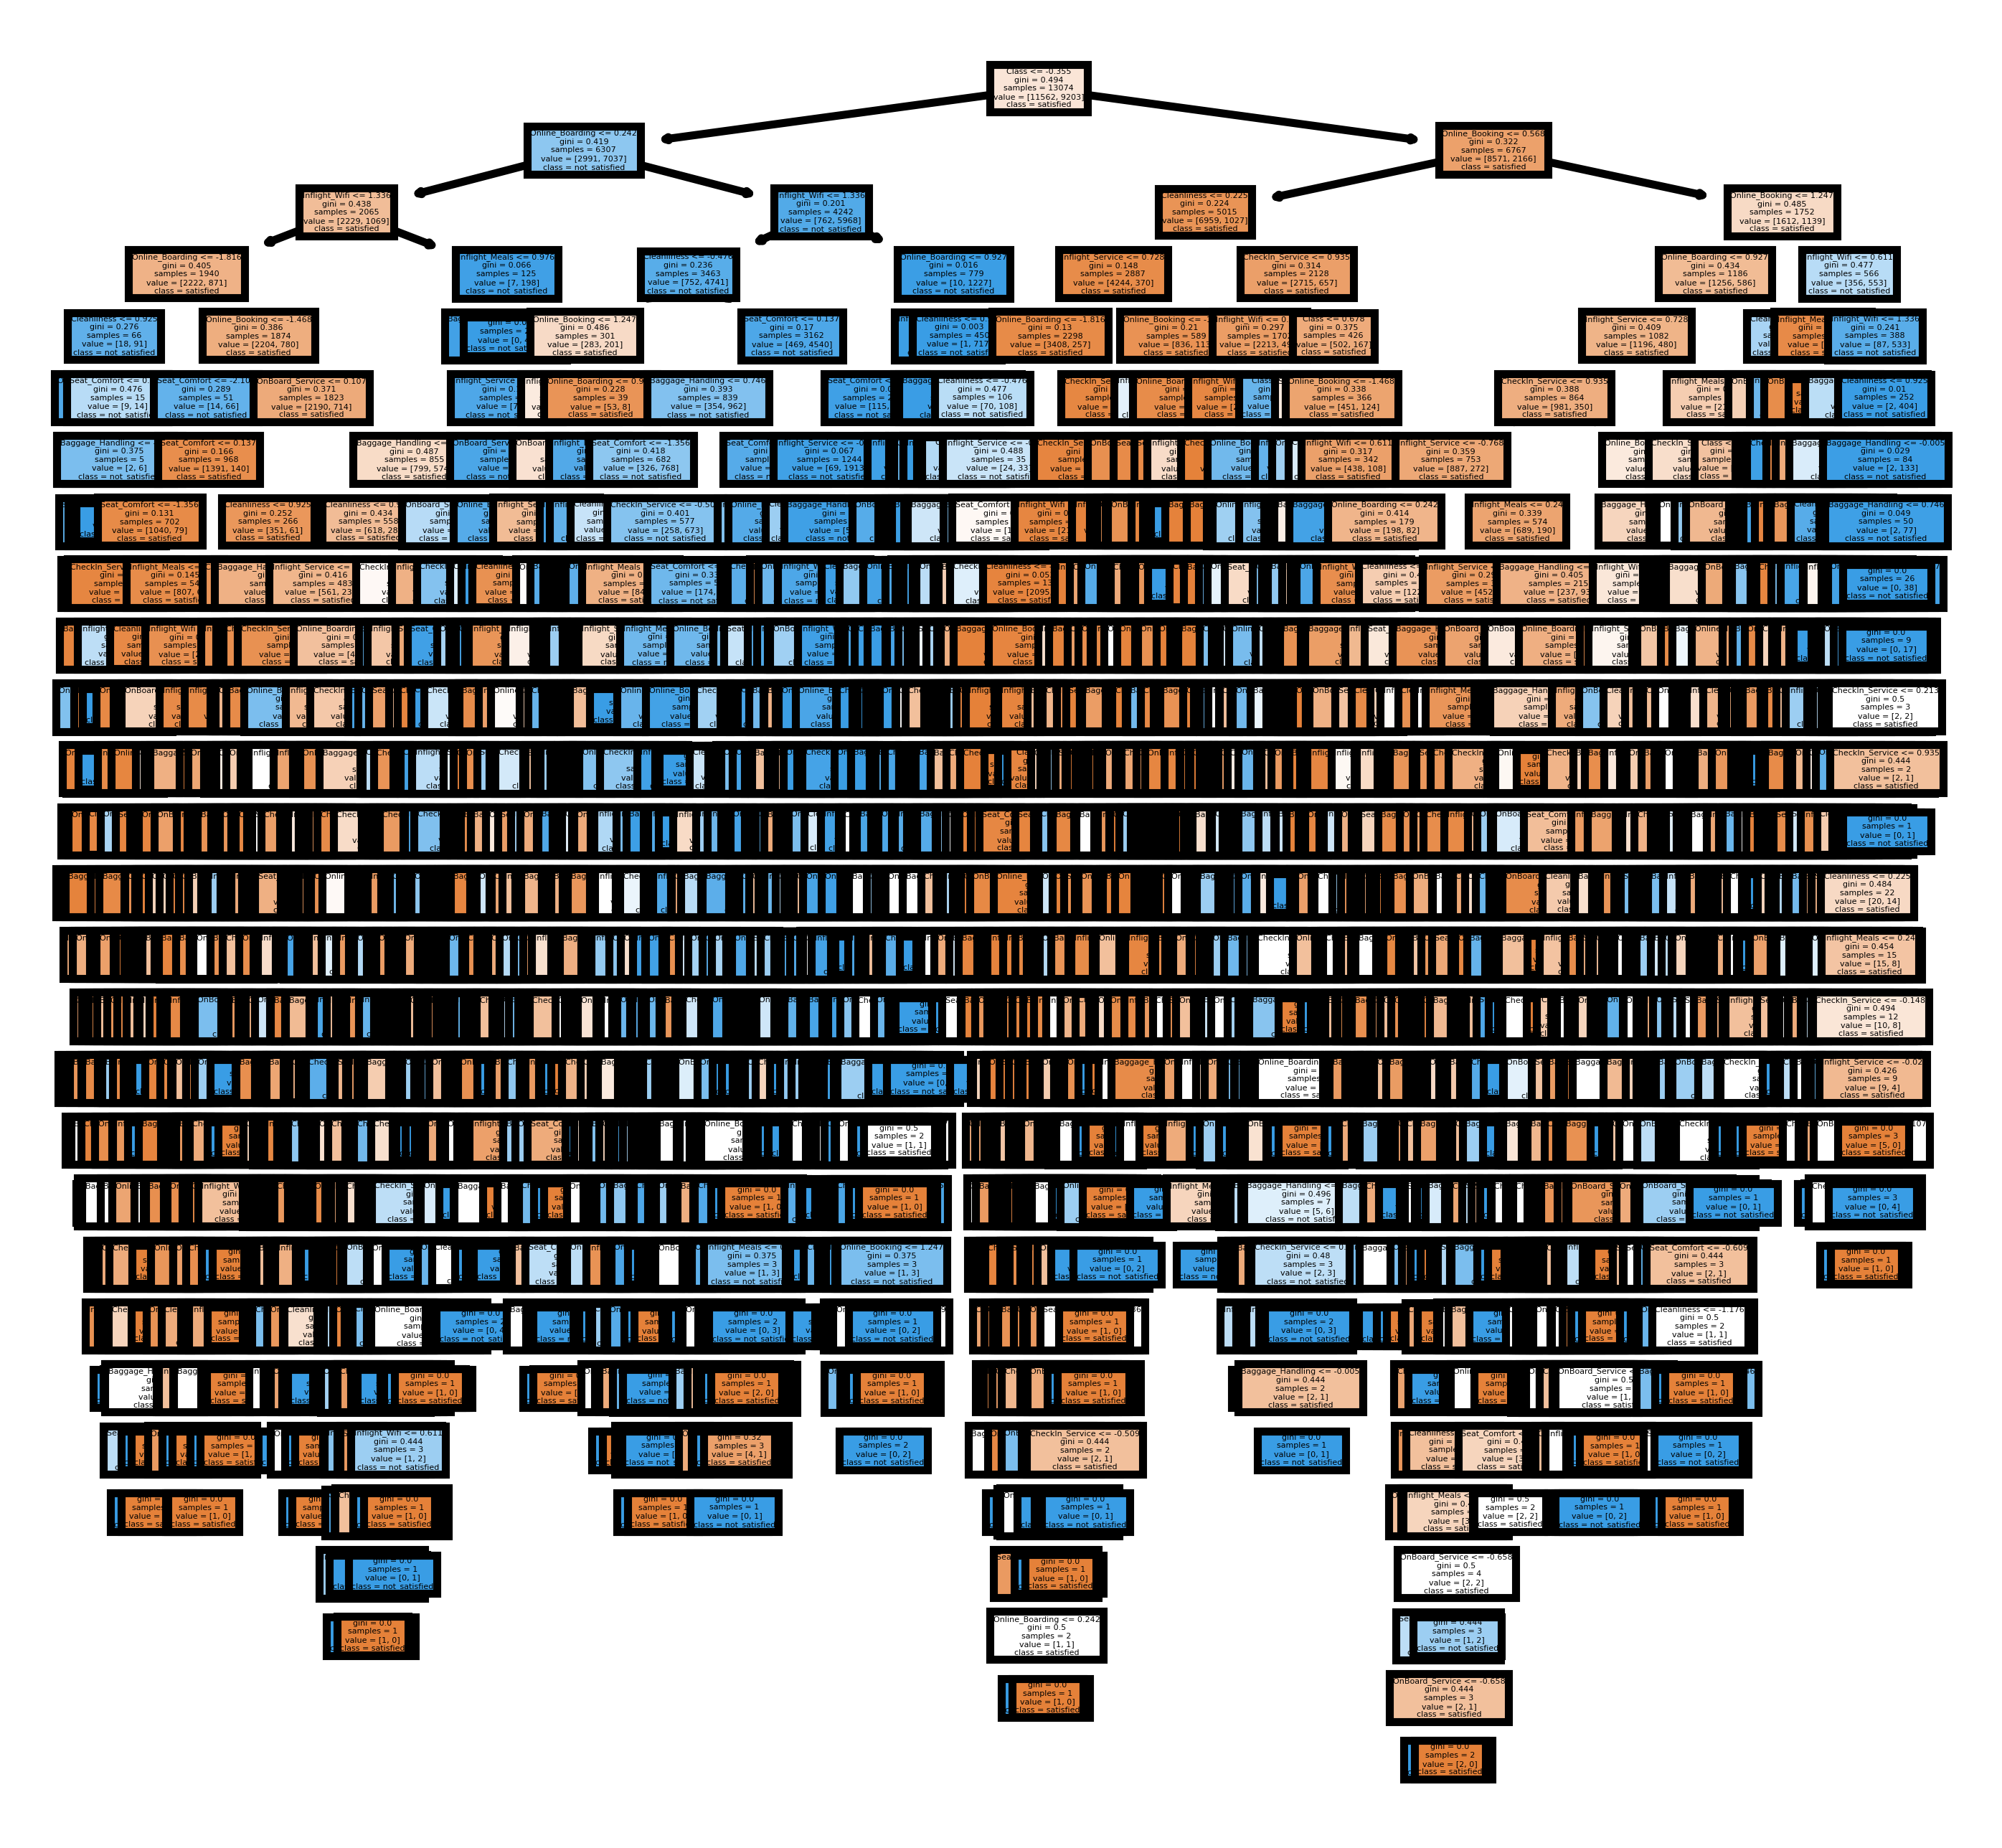

In [73]:
# Visualize an individual tree
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names=X_train.columns.tolist(),
               class_names=['satisfied', 'not_satisfied'],
               filled=True)
fig.savefig('rf_individualtree.png')

#### Visualizing Features Importance

In [74]:
# Create a DataFrame to store the feature importances
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})

# Sort the DataFrame by importance values in descending order
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feat_df)

                   Feature  Importance
4          Online_Boarding    0.215442
1            Inflight_Wifi    0.185102
0                    Class    0.160652
10            Seat_Comfort    0.079013
2           Online_Booking    0.062623
5          OnBoard_Service    0.058944
9              Cleanliness    0.057587
7          CheckIn_Service    0.048620
6         Baggage_Handling    0.047491
8         Inflight_Service    0.046264
3           Inflight_Meals    0.038264
11  Inflight_Entertainment    0.000000
12          Ground_Service    0.000000
13         Value_For_Money    0.000000


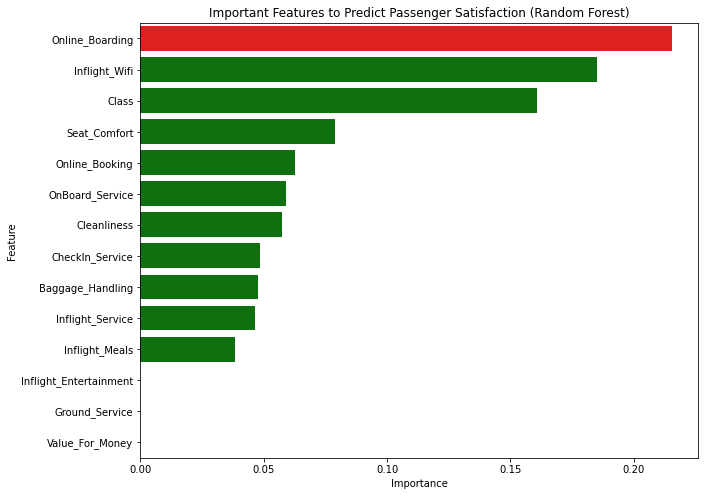

In [75]:
# Plot the feature x importance
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important Features to Predict Passenger Satisfaction (Random Forest)')
plt.show()

#### Visualizing Confusion Matrix for Random Forest
Create predictions from the test set and create a classification report and a confusion matrix. 

In [76]:
predictions = rfc.predict(X_test)

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3088
           1       0.90      0.91      0.90      2286

    accuracy                           0.92      5374
   macro avg       0.92      0.92      0.92      5374
weighted avg       0.92      0.92      0.92      5374



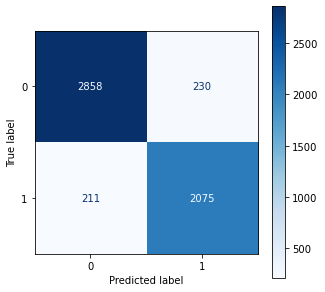

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the classification report
print(classification_report(y_test, predictions))

# Plot the confusion matrix
plt.rcParams["figure.figsize"] = (5,5)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### Random Forest Accuracy Scores 

##### Gini Accuracy Score 

In [78]:
# import accuracy_score 
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=rfc.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=predictions))

Accuracy Score on train data (using Default criterionas gini):  0.9949434143992295
Accuracy Score on test data (using Default criterionas gini):  0.917938221064384


##### Entropy Accuracy Score 

In [79]:
# Changing the Criterion to Entropy
rfc_entropy = RandomForestClassifier(criterion = 'entropy')

#Training the decision tree classifier. 
rfc_entropy.fit(X_train, y_train)

#Predicting labels on the test set.
y_pred_entropy =  rfc_entropy.predict(X_test)


print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =rfc_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy Score on train data (using Default criterion as Entropy):  0.9949434143992295
Accuracy Score on test data (using Default criterion as Entropy):  0.9184964644585039


##### Entropy Accuracy (min_split) Score 

In [80]:
#Entropy Min
# After tune the parameters of the decision tree to increase its accuracy
rfc_entropy2 = RandomForestClassifier(min_samples_split=50)
rfc_entropy2.fit(X_train, y_train)

print('Accuracy Score on train data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_train, y_pred=rfc_entropy2.predict(X_train)))
print('Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_test, y_pred=rfc_entropy2.predict(X_test)))

Accuracy Score on train data (using Default criterion as Entropy & min_samples_split):  0.9413917649891644
Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split):  0.915891328619278


C:\Users\kim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# 10. Conclusion